#Loading libraries and data

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing training data
df_train = pd.read_csv('train_XnW6LSF.csv')
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#importing training data
df_test = pd.read_csv('test_FewQE9B.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#Missing Data Analysis and Filling

In [4]:
percent_missing = df_train.isnull().sum()*100/len(df_train)
percent_missing_df = pd.DataFrame({'column_name': df_train.columns, "missing_value_count" :df_train.isnull().sum(),'percent_missing': percent_missing})
percent_missing_df.reset_index(drop=True, inplace=True)
percent_missing_df.sort_values('percent_missing', ascending=False, inplace=True)
percent_missing_df

,column_name,missing_value_count,percent_missing
8,Outlet_Size,2410,28.276428
1,Item_Weight,1463,17.165317
0,Item_Identifier,0,0.000000
2,Item_Fat_Content,0,0.000000
3,Item_Visibility,0,0.000000
4,Item_Type,0,0.000000
5,Item_MRP,0,0.000000
6,Outlet_Identifier,0,0.000000
7,Outlet_Establishment_Year,0,0.000000
9,Outlet_Location_Type,0,0.000000


In [5]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df_train['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [7]:
df_train['Item_Weight'].mean()

12.857645184135976

In [8]:
df_train['Item_Weight'].mode()

0    12.15
Name: Item_Weight, dtype: float64

In [9]:
df_train['Item_Weight'].median()

12.6

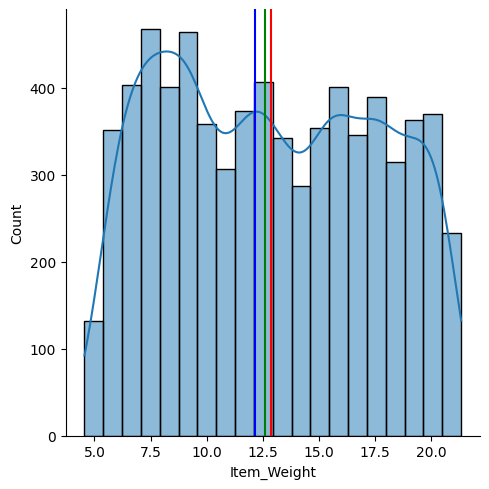

In [10]:
import seaborn as sns

#create histogram with density curve overlaid
sns.displot(df_train['Item_Weight'], kde=True, bins=20)
plt.axvline(x=df_train['Item_Weight'].mean(), color='red')
plt.axvline(x=df_train['Item_Weight'].median(), color='green')
plt.axvline(x=df_train['Item_Weight'].mode()[0], color='blue')


In [11]:
df_train[["Outlet_Size","Outlet_Location_Type","Outlet_Type"]].value_counts(dropna=False)

Outlet_Size  Outlet_Location_Type  Outlet_Type      
NaN          Tier 2                Supermarket Type1    1855
Medium       Tier 3                Supermarket Type3     935
High         Tier 3                Supermarket Type1     932
Medium       Tier 1                Supermarket Type1     930
Small        Tier 1                Supermarket Type1     930
             Tier 2                Supermarket Type1     930
Medium       Tier 3                Supermarket Type2     928
NaN          Tier 3                Grocery Store         555
Small        Tier 1                Grocery Store         528
dtype: int64

In [12]:
df_train[df_train['Outlet_Location_Type']=='Tier 2'][["Outlet_Size","Outlet_Location_Type","Outlet_Type"]].value_counts(dropna=False)

Outlet_Size  Outlet_Location_Type  Outlet_Type      
NaN          Tier 2                Supermarket Type1    1855
Small        Tier 2                Supermarket Type1     930
dtype: int64

In [13]:
# df_train['Outlet_Size'] = df_train.groupby('Outlet_Location_Type')['Outlet_Size'].ffill()

In [14]:
missing_mask = df_train['Outlet_Size'].isna()
mapping_dict = dict({'Tier 2': 'Small', 'Tier 3':'Medium'})

df_train.loc[missing_mask, 'Outlet_Size'] = df_train.loc[missing_mask, 'Outlet_Location_Type'].map(mapping_dict)
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna('Medium')

df_test.loc[missing_mask, 'Outlet_Size'] = df_test.loc[missing_mask, 'Outlet_Location_Type'].map(mapping_dict)
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna('Medium')

In [15]:
# df_train[df_train['Outlet_Location_Type']=='Tier 2'][["Outlet_Size","Outlet_Location_Type","Outlet_Type"]].value_counts(dropna=False)


In [16]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [17]:
# df_train.drop("Outlet_Size",axis=1,inplace=True)
# df_train[df_train['Outlet_Location_Type']=='Tier 2']['Outlet_Size'].fillna(df_train[df_train['Outlet_Location_Type']=='Tier 2']['Outlet_Size'].mode()[0], inplace=True)
# df_train.drop("Item_Weight",axis=1,inplace=True)
# df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
# df_train

In [18]:
percent_missing_test = df_test.isnull().sum()*100/len(df_test)
percent_missing_df_test = pd.DataFrame({'column_name': df_test.columns, "missing_value_count" :df_test.isnull().sum(),'percent_missing': percent_missing_test})
percent_missing_df_test.reset_index(drop=True, inplace=True)
percent_missing_df_test.sort_values('percent_missing', ascending=False, inplace=True)
percent_missing_df_test

,column_name,missing_value_count,percent_missing
1,Item_Weight,976,17.180074
0,Item_Identifier,0,0.000000
2,Item_Fat_Content,0,0.000000
3,Item_Visibility,0,0.000000
4,Item_Type,0,0.000000
5,Item_MRP,0,0.000000
6,Outlet_Identifier,0,0.000000
7,Outlet_Establishment_Year,0,0.000000
8,Outlet_Size,0,0.000000
9,Outlet_Location_Type,0,0.000000


In [19]:
df_train[["Item_Weight","Item_Type","Item_Fat_Content"]].value_counts(dropna=False)


Item_Weight  Item_Type              Item_Fat_Content
NaN          Household              Low Fat             141
             Snack Foods            Low Fat             116
             Fruits and Vegetables  Regular             101
                                    Low Fat             100
             Snack Foods            Regular              84
                                                       ... 
8.600        Breads                 reg                   1
             Household              low fat               1
8.615        Fruits and Vegetables  low fat               1
16.350       Household              low fat               1
NaN          Starchy Foods          reg                   1
Length: 1763, dtype: int64

In [20]:
df_train[df_train['Item_Type']=='Dairy'][["Item_Weight","Item_Type"]].value_counts(dropna=False)


Item_Weight  Item_Type
NaN          Dairy        116
20.70        Dairy         21
20.25        Dairy         18
16.70        Dairy         17
13.10        Dairy         15
                         ... 
18.35        Dairy          3
7.71         Dairy          2
8.05         Dairy          2
7.89         Dairy          2
12.80        Dairy          1
Length: 96, dtype: int64

Filling in Item_Weight based on average of Item weights of each Item_type

In [21]:
missing_mask = df_train['Item_Weight'].isna()
mapping_dict = []#dict({'Tier 2': 'Small', 'Tier 3':'Medium'})

for i in sorted(df_train['Item_Type'].unique()):
  mapping_dict.append((i,df_train[df_train['Item_Type']==i]['Item_Weight'].mean()))

mapping_dict=dict(mapping_dict)

df_train.loc[missing_mask, 'Item_Weight'] = df_train.loc[missing_mask, 'Item_Type'].map(mapping_dict)

missing_mask = df_test['Item_Weight'].isna()
df_test.loc[missing_mask, 'Item_Weight'] = df_test.loc[missing_mask, 'Item_Type'].map(mapping_dict)

# df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna('Medium')

# df_test.loc[missing_mask, 'Outlet_Size'] = df_test.loc[missing_mask, 'Outlet_Location_Type'].map(mapping_dict)
# df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna('Medium')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,13.426069,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [22]:
# df_test.drop("Outlet_Size",axis=1,inplace=True)
# df_test['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)
# df_test.drop("Item_Weight",axis=1,inplace=True)
# df_test['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,13.426069,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [23]:
percent_missing = df_train.isnull().sum()*100/len(df_train)
percent_missing_df = pd.DataFrame({'column_name': df_train.columns, "missing_value_count" :df_train.isnull().sum(),'percent_missing': percent_missing})
percent_missing_df.reset_index(drop=True, inplace=True)
percent_missing_df.sort_values('percent_missing', ascending=False, inplace=True)
percent_missing_df

,column_name,missing_value_count,percent_missing
0,Item_Identifier,0,0.0
1,Item_Weight,0,0.0
2,Item_Fat_Content,0,0.0
3,Item_Visibility,0,0.0
4,Item_Type,0,0.0
5,Item_MRP,0,0.0
6,Outlet_Identifier,0,0.0
7,Outlet_Establishment_Year,0,0.0
8,Outlet_Size,0,0.0
9,Outlet_Location_Type,0,0.0


In [24]:
percent_missing_test = df_test.isnull().sum()*100/len(df_test)
percent_missing_df_test = pd.DataFrame({'column_name': df_test.columns, "missing_value_count" :df_test.isnull().sum(),'percent_missing': percent_missing_test})
percent_missing_df_test.reset_index(drop=True, inplace=True)
percent_missing_df_test.sort_values('percent_missing', ascending=False, inplace=True)
percent_missing_df_test

,column_name,missing_value_count,percent_missing
0,Item_Identifier,0,0.0
1,Item_Weight,0,0.0
2,Item_Fat_Content,0,0.0
3,Item_Visibility,0,0.0
4,Item_Type,0,0.0
5,Item_MRP,0,0.0
6,Outlet_Identifier,0,0.0
7,Outlet_Establishment_Year,0,0.0
8,Outlet_Size,0,0.0
9,Outlet_Location_Type,0,0.0


#Processing the categorical variables

In [25]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [26]:
for col in df_train.columns:
  if df_train[col].dtype=="object":
    print(col, sorted(df_train[col].unique()))

Item_Identifier ['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48', 'DRC01', 'DRC12', 'DRC13', 'DRC24', 'DRC25', 'DRC27', 'DRC36', 'DRC49', 'DRD01', 'DRD12', 'DRD13', 'DRD15', 'DRD24', 'DRD25', 'DRD27', 'DRD37', 'DRD49', 'DRD60', 'DRE01', 'DRE03', 'DRE12', 'DRE13', 'DRE15', 'DRE25', 'DRE27', 'DRE37', 'DRE48', 'DRE49', 'DRE60', 'DRF01', 'DRF03', 'DRF13', 'DRF15', 'DRF23', 'DRF25', 'DRF27', 'DRF36', 'DRF37', 'DRF48', 'DRF49', 'DRF51', 'DRF60', 'DRG01', 'DRG03', 'DRG11', 'DRG13', 'DRG15', 'DRG23', 'DRG25', 'DRG27', 'DRG36', 'DRG37', 'DRG39', 'DRG48', 'DRG49', 'DRG51', 'DRH01', 'DRH03', 'DRH11', 'DRH13', 'DRH15', 'DRH23', 'DRH25', 'DRH36', 'DRH37', 'DRH39', 'DRH49', 'DRH51', 'DRH59', 'DRI01', 'DRI03', 'DRI11', 'DRI13', 'DRI23', 'DRI25', 'DRI37', 'DRI39', 'DRI47', 'DRI49', 'DRI51', 'DRI59', 'DRJ01', 'DRJ11', 'DRJ13', 'DRJ23', 'DRJ24', 'DRJ25', 'DRJ35', 'DRJ37', 'DRJ39', 'DRJ47', 'DRJ49', 'DRJ51', 'DRJ59', 'DRK01', 'DRK11', 'DRK12', 'DRK13', 'DRK23', 'DRK35', 'DRK37', 'D

In [27]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
df_train['Item_Fat_Content'].replace(to_replace=["low fat", "LF"], value="Low Fat",inplace=True)
df_train['Item_Fat_Content'].replace(to_replace="reg", value="Regular",inplace=True)


df_test['Item_Fat_Content'].replace(to_replace=["low fat", "LF"], value="Low Fat",inplace=True)
df_test['Item_Fat_Content'].replace(to_replace="reg", value="Regular",inplace=True)

In [29]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [30]:
def value_mapping(df,col):
  return dict(map(lambda x,y: (x,y), sorted(df[col].unique()),range(len(df[col].unique()))))

In [31]:
def categorical_columns_mapping(df):
  col_val_mapping=[]
  for col in df.columns:
    if df_train[col].dtype=="object":
      col_val_mapping.append(value_mapping(df,col))
  return dict(map(lambda x,y: (x,y), [col for col in df.columns if df_train[col].dtype=="object"],col_val_mapping))


In [32]:


categorical_columns_map = categorical_columns_mapping(df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1))

In [33]:
# for col in categorical_columns_map:
#   print(col,categorical_columns_map[col])
#   df_train[col]=df_train[col].map(categorical_columns_map[col])
#   df_test[col]=df_test[col].map(categorical_columns_map[col])
# #Do check encoder.fit_transform
# df_train

In [34]:
# for i in df_train.columns[:-1]:
#   if i not in ["Item_Outlet_Sales",'Outlet_Identifier','Item_Identifier']:
#     print(i)
#     df_train[i] = (df_train[i] - df_train[i].min()) / (df_train[i].max() - df_train[i].min())
#     df_test[i] = (df_test[i] - df_train[i].min()) / (df_train[i].max() - df_train[i].min())
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [35]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,13.426069,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [36]:
dummies_Item_Fat_Content = pd.get_dummies(df_train.Item_Fat_Content)
dummies_Item_Type = pd.get_dummies(df_train.Item_Type)
dummies_Outlet_Size = pd.get_dummies(df_train.Outlet_Size)
dummies_Outlet_Location_Type = pd.get_dummies(df_train.Outlet_Location_Type)
dummies_Outlet_Type = pd.get_dummies(df_train.Outlet_Type)

df_train = pd.concat([df_train.Item_Identifier, df_train.Item_Weight, dummies_Item_Fat_Content,
                       df_train.Item_Visibility,dummies_Item_Type,df_train.Item_MRP,
                       df_train.Outlet_Identifier, df_train.Outlet_Establishment_Year,dummies_Outlet_Size,
                       dummies_Outlet_Location_Type, dummies_Outlet_Type, df_train.Item_Outlet_Sales],
                     axis='columns')

df_train

,Item_Identifier,Item_Weight,Low Fat,Regular,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Outlet_Sales
0,FDA15,9.300,1,0,0.016047,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,3735.1380
1,DRC01,5.920,0,1,0.019278,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,443.4228
2,FDN15,17.500,1,0,0.016760,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,2097.2700
3,FDX07,19.200,0,1,0.000000,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,732.3800
4,NCD19,8.930,1,0,0.000000,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0,0.056783,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2778.3834
8519,FDS36,8.380,0,1,0.046982,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,549.2850
8520,NCJ29,10.600,1,0,0.035186,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1193.1136
8521,FDN46,7.210,0,1,0.145221,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1845.5976


In [37]:
dummies_Item_Fat_Content = pd.get_dummies(df_test.Item_Fat_Content)
dummies_Item_Type = pd.get_dummies(df_test.Item_Type)
# dummies_Outlet_Identifier = pd.get_dummies(df_test.Outlet_Identifier)
dummies_Outlet_Size = pd.get_dummies(df_test.Outlet_Size)
dummies_Outlet_Location_Type = pd.get_dummies(df_test.Outlet_Location_Type)
dummies_Outlet_Type = pd.get_dummies(df_test.Outlet_Type)

df_test = pd.concat([df_test.Item_Identifier, df_test.Item_Weight, dummies_Item_Fat_Content,
                       df_test.Item_Visibility,dummies_Item_Type,df_test.Item_MRP,
                       df_test.Outlet_Identifier, df_test.Outlet_Establishment_Year,dummies_Outlet_Size,
                       dummies_Outlet_Location_Type, dummies_Outlet_Type],
                     axis='columns')

df_test

,Item_Identifier,Item_Weight,Low Fat,Regular,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,20.750000,1,0,0.007565,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,FDW14,8.300000,0,1,0.038428,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,NCN55,14.600000,1,0,0.099575,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,FDQ58,7.315000,1,0,0.015388,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,FDY38,13.426069,0,1,0.118599,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,0,1,0.013496,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5677,FDD47,7.600000,0,1,0.142991,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5678,NCO17,10.000000,1,0,0.073529,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5679,FDJ26,15.300000,0,1,0.000000,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [38]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Low Fat                        uint8
Regular                        uint8
Item_Visibility              float64
Baking Goods                   uint8
Breads                         uint8
Breakfast                      uint8
Canned                         uint8
Dairy                          uint8
Frozen Foods                   uint8
Fruits and Vegetables          uint8
Hard Drinks                    uint8
Health and Hygiene             uint8
Household                      uint8
Meat                           uint8
Others                         uint8
Seafood                        uint8
Snack Foods                    uint8
Soft Drinks                    uint8
Starchy Foods                  uint8
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
High                           uint8
Medium                         uint8
Small                          uint8
T

In [39]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Low Fat                        uint8
Regular                        uint8
Item_Visibility              float64
Baking Goods                   uint8
Breads                         uint8
Breakfast                      uint8
Canned                         uint8
Dairy                          uint8
Frozen Foods                   uint8
Fruits and Vegetables          uint8
Hard Drinks                    uint8
Health and Hygiene             uint8
Household                      uint8
Meat                           uint8
Others                         uint8
Seafood                        uint8
Snack Foods                    uint8
Soft Drinks                    uint8
Starchy Foods                  uint8
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
High                           uint8
Medium                         uint8
Small                          uint8
T

#Test Train Split

In [40]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
X = df_train.drop(["Item_Outlet_Sales",'Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier'], axis=1)
y = df_train['Item_Outlet_Sales']


X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=10,test_size=0.1)
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)


(((7670, 31), (7670,)), ((853, 31), (853,)))

In [42]:
from keras.models import Sequential


In [43]:
from keras.layers import InputLayer, Dense, Dropout
from keras import regularizers

# from keras.layers.core import Dense , Dropout


In [44]:
input_neurons = X_train.shape[1]

output_neurons = 1

number_of_hidden_layers = 2
neuron_hidden_layer_1 = 35
neuron_hidden_layer_2 = 10

In [45]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [46]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))
model.compile(loss=root_mean_squared_error,optimizer='Adam', metrics=['mae', 'mape'])

model_history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=150)

Epoch 1/250
240/240 [==============================] - 3s 3ms/step - loss: 2396.6052 - mae: 1842.4275 - mape: 86.8639 - val_loss: 1604.5023 - val_mae: 1163.6193 - val_mape: 98.9037
Epoch 2/250
240/240 [==============================] - 1s 3ms/step - loss: 1423.2427 - mae: 1057.7454 - mape: 142.7889 - val_loss: 1339.0236 - val_mae: 1006.4175 - val_mape: 150.9347
Epoch 3/250
240/240 [==============================] - 1s 4ms/step - loss: 1387.2338 - mae: 1040.3000 - mape: 149.7826 - val_loss: 1333.5634 - val_mae: 997.5140 - val_mape: 146.2215
Epoch 4/250
240/240 [==============================] - 1s 3ms/step - loss: 1388.3536 - mae: 1037.7760 - mape: 148.8280 - val_loss: 1330.9860 - val_mae: 996.7961 - val_mape: 146.6392
Epoch 5/250
240/240 [==============================] - 1s 3ms/step - loss: 1385.2759 - mae: 1034.7645 - mape: 147.9148 - val_loss: 1327.0729 - val_mae: 990.1934 - val_mape: 142.9765
Epoch 6/250
240/240 [==============================] - 1s 4ms/step - loss: 1381.5103 - mae

In [47]:
def plots(model_history):
  plt.plot(model_history.history['loss'])
  plt.plot(model_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for accuracy
  plt.plot(model_history.history['mape'])
  plt.plot(model_history.history['val_mape'])
  plt.title('model mape')
  plt.ylabel('mape')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for accuracy
  plt.plot(model_history.history['mae'])
  plt.plot(model_history.history['val_mae'])
  plt.title('model mae')
  plt.ylabel('mae')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()



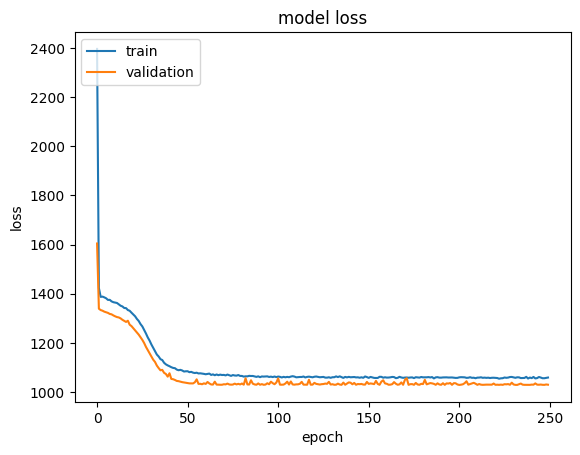

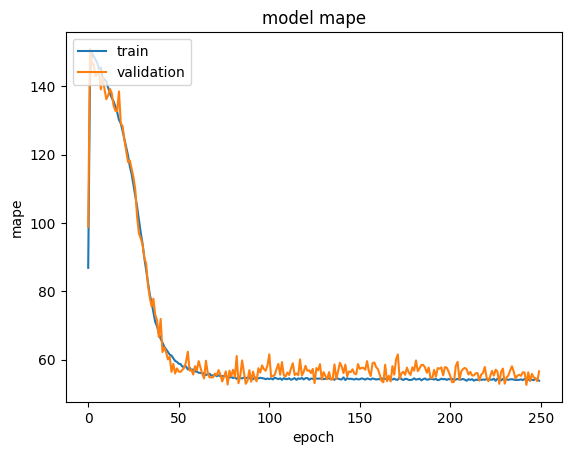

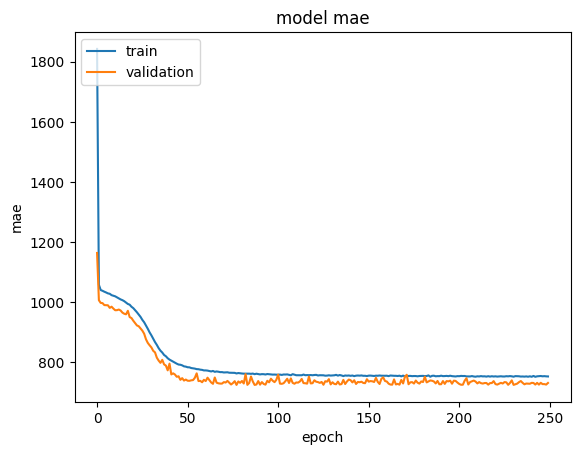

In [48]:
plots(model_history)

In [49]:
prediction = model.predict(df_test.drop(['Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier'], axis=1))
print(prediction.max(),prediction.min())
prediction

178/178 [==============================] - 1s 2ms/step
6387.159 41.29968


array([[1731.6494],
       [1563.5095],
       [ 634.1159],
       ...,
       [1881.0225],
       [3694.3916],
       [1442.2793]], dtype=float32)

In [50]:
df_solution=df_test[['Item_Identifier','Outlet_Identifier']]
df_solution["Item_Outlet_Sales"]=prediction
df_solution

<ipython-input-50-2a56efdac2ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solution["Item_Outlet_Sales"]=prediction


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1731.649414
1,FDW14,OUT017,1563.509521
2,NCN55,OUT010,634.115906
3,FDQ58,OUT017,2536.065674
4,FDY38,OUT027,5742.657715
...,...,...,...
5676,FDB58,OUT046,2238.581055
5677,FDD47,OUT018,2479.423096
5678,NCO17,OUT045,1881.022461
5679,FDJ26,OUT017,3694.391602


In [51]:
df_solution.to_csv("solution.csv",index=False)